In [1]:
import os
import pandas as pd
from textblob import *
import nltk
import numpy as np
import openpyxl
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import *
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


'''Start with ISOT'''

FILENAME = r"../data/Des_fake_news/ISOT_PROCESSED.csv"
data = pd.read_csv(FILENAME)
data



,Unnamed: 0,title,text,subject,date,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,0,As U S budget fight looms Republicans flip t...,WASHINGTON Reuters The head of a conservat...,politicsNews,2017-12-31 0:00,1,0.037083,0.410250,0.00,0.0,0.318,0.682,0.000,0.052,0.852,0.096
1,1,U S military to accept transgender recruits o...,WASHINGTON Reuters Transgender people will...,politicsNews,2017-12-29 0:00,1,0.044354,0.308401,-0.10,0.1,0.000,0.776,0.224,0.089,0.821,0.090
2,2,Senior U S Republican senator Let Mr Muell...,WASHINGTON Reuters The special counsel inv...,politicsNews,2017-12-31 0:00,1,0.115930,0.316798,0.00,0.0,0.000,1.000,0.000,0.049,0.904,0.047
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON Reuters Trump campaign adviser ...,politicsNews,2017-12-30 0:00,1,0.035968,0.306569,0.00,0.0,0.000,1.000,0.000,0.070,0.865,0.065
4,4,Trump wants Postal Service to charge much mor...,SEATTLE WASHINGTON Reuters President Donal...,politicsNews,2017-12-29 0:00,1,0.031316,0.398166,0.35,0.3,0.000,0.835,0.165,0.049,0.891,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44872,44872,McPain John McCain Furious That Iran Treated ...,st Century Wire says As WIRE reported earlier ...,Middle-east,42385,0,0.085978,0.524124,0.00,0.0,0.268,0.580,0.152,0.100,0.784,0.117
44873,44873,JUSTICE Yahoo Settles E mail Privacy Class ac...,st Century Wire says It s a familiar theme Wh...,Middle-east,42385,0,0.110000,0.610000,0.10,0.1,0.000,0.744,0.256,0.047,0.865,0.087
44874,44874,Sunnistan US and Allied Safe Zone Plan to Tak...,Patrick Henningsen st Century WireRemember wh...,Middle-east,42384,0,0.073528,0.415687,0.50,0.5,0.000,0.818,0.182,0.125,0.770,0.105
44875,44875,How to Blow Million Al Jazeera America Fina...,st Century Wire says Al Jazeera America will g...,Middle-east,42383,0,0.088566,0.426744,0.00,1.0,0.000,1.000,0.000,0.082,0.840,0.077


In [2]:
reals = data[data["label"] == 1].reset_index(drop=True)
reals

,Unnamed: 0,title,text,subject,date,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,0,As U S budget fight looms Republicans flip t...,WASHINGTON Reuters The head of a conservat...,politicsNews,2017-12-31 0:00,1,0.037083,0.410250,0.000000,0.000000,0.318,0.682,0.000,0.052,0.852,0.096
1,1,U S military to accept transgender recruits o...,WASHINGTON Reuters Transgender people will...,politicsNews,2017-12-29 0:00,1,0.044354,0.308401,-0.100000,0.100000,0.000,0.776,0.224,0.089,0.821,0.090
2,2,Senior U S Republican senator Let Mr Muell...,WASHINGTON Reuters The special counsel inv...,politicsNews,2017-12-31 0:00,1,0.115930,0.316798,0.000000,0.000000,0.000,1.000,0.000,0.049,0.904,0.047
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON Reuters Trump campaign adviser ...,politicsNews,2017-12-30 0:00,1,0.035968,0.306569,0.000000,0.000000,0.000,1.000,0.000,0.070,0.865,0.065
4,4,Trump wants Postal Service to charge much mor...,SEATTLE WASHINGTON Reuters President Donal...,politicsNews,2017-12-29 0:00,1,0.031316,0.398166,0.350000,0.300000,0.000,0.835,0.165,0.049,0.891,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,21412,Fully committed NATO backs new U S approach...,BRUSSELS Reuters NATO allies on Tuesday we...,worldnews,2017-08-22 0:00,1,0.215303,0.446288,0.136364,0.454545,0.123,0.675,0.202,0.102,0.780,0.118
21413,21413,LexisNexis withdrew two products from Chinese ...,LONDON Reuters LexisNexis a provider of l...,worldnews,2017-08-22 0:00,1,0.022222,0.077778,0.000000,0.000000,0.000,1.000,0.000,0.022,0.920,0.057
21414,21414,Minsk cultural hub becomes haven from authorities,MINSK Reuters In the shadow of disused Sov...,worldnews,2017-08-22 0:00,1,0.050654,0.425658,0.100000,0.100000,0.000,1.000,0.000,0.019,0.873,0.108
21415,21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW Reuters Vatican Secretary of State ...,worldnews,2017-08-22 0:00,1,0.021993,0.377753,0.000000,0.000000,0.000,1.000,0.000,0.051,0.852,0.097


In [3]:
fakes = data[data["label"] == 0].reset_index(drop=True)
fakes

,Unnamed: 0,title,text,subject,date,label,text_tb_pol,text_tb_sub,title_tb_pol,title_tb_sub,title_vader_neg,title_vader_neu,title_vader_pos,text_vader_neg,text_vader_neu,text_vader_pos
0,21417,Donald Trump Sends Out Embarrassing New Years...,Donald Trump just couldn t wish all Americans ...,News,43100,0,0.089028,0.595139,-0.181818,0.627273,0.371,0.629,0.000,0.142,0.711,0.147
1,21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,43100,0,-0.004838,0.322962,-0.250000,0.500000,0.255,0.745,0.000,0.082,0.847,0.071
2,21419,Sheriff David Clarke Becomes An Internet Joke...,On Friday it was revealed that former Milwauk...,News,43099,0,0.021803,0.551790,0.000000,0.000000,0.183,0.699,0.118,0.134,0.798,0.068
3,21420,Trump Is So Obsessed He Even Has Obamas Name ...,On Christmas day Donald Trump announced that ...,News,43098,0,0.009140,0.372581,-0.500000,1.000000,0.147,0.853,0.000,0.071,0.881,0.048
4,21421,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,43094,0,-0.011722,0.495222,0.000000,0.000000,0.000,1.000,0.000,0.077,0.848,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23455,44872,McPain John McCain Furious That Iran Treated ...,st Century Wire says As WIRE reported earlier ...,Middle-east,42385,0,0.085978,0.524124,0.000000,0.000000,0.268,0.580,0.152,0.100,0.784,0.117
23456,44873,JUSTICE Yahoo Settles E mail Privacy Class ac...,st Century Wire says It s a familiar theme Wh...,Middle-east,42385,0,0.110000,0.610000,0.100000,0.100000,0.000,0.744,0.256,0.047,0.865,0.087
23457,44874,Sunnistan US and Allied Safe Zone Plan to Tak...,Patrick Henningsen st Century WireRemember wh...,Middle-east,42384,0,0.073528,0.415687,0.500000,0.500000,0.000,0.818,0.182,0.125,0.770,0.105
23458,44875,How to Blow Million Al Jazeera America Fina...,st Century Wire says Al Jazeera America will g...,Middle-east,42383,0,0.088566,0.426744,0.000000,1.000000,0.000,1.000,0.000,0.082,0.840,0.077


In [4]:
if "LIAR" in FILENAME:
    real_corpus = reals["text"]
else:
    real_corpus = pd.concat((reals["text"], reals["title"]), ignore_index=True, axis=0).reset_index(drop=True)

real_corpus

0        WASHINGTON  Reuters    The head of a conservat...
1        WASHINGTON  Reuters    Transgender people will...
2        WASHINGTON  Reuters    The special counsel inv...
3        WASHINGTON  Reuters    Trump campaign adviser ...
4        SEATTLE WASHINGTON  Reuters    President Donal...
                               ...                        
42829     Fully committed  NATO backs new U S  approach...
42830    LexisNexis withdrew two products from Chinese ...
42831    Minsk cultural hub becomes haven from authorities
42832    Vatican upbeat on possibility of Pope Francis ...
42833    Indonesia to buy    billion worth of Russian jets
Length: 42834, dtype: object

In [5]:
if "LIAR" in FILENAME:
    fake_corpus = fakes["text"]
else:
    fake_corpus = pd.concat((fakes["text"], fakes["title"]), axis=0).reset_index(drop=True)

fake_corpus

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday  it was revealed that former Milwauk...
3        On Christmas day  Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
46915    McPain  John McCain Furious That Iran Treated ...
46916    JUSTICE  Yahoo Settles E mail Privacy Class ac...
46917    Sunnistan  US and Allied Safe Zone Plan to Tak...
46918    How to Blow   Million  Al Jazeera America Fina...
46919     U S  Navy Sailors Held by Iranian Military  S...
Length: 46920, dtype: object

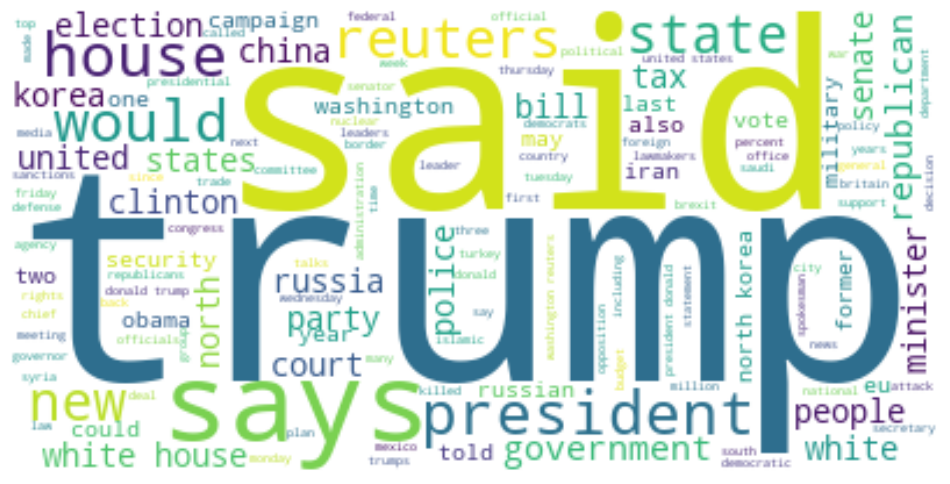

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(real_corpus).toarray()
names = vectorizer.get_feature_names_out()
#real_words = real_words.todense().tolist()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Blues").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(strip_accents="ascii", lowercase=True, stop_words=stop_words, max_features=500, ngram_range=(1,3))

words = vectorizer.fit_transform(fake_corpus).toarray()
names = vectorizer.get_feature_names_out()
df = pd.DataFrame(words, columns=names).sum(axis=0).transpose()

cloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(df)

plt.figure(figsize=(12, 8), dpi=100)
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()